In [1]:
# 回归模型

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
# 获取房价数据集
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing.DESCR)
print(housing.data.shape)    # X
print(housing.target.shape)  # Y

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# import pprint   # pprint 输出格式相对print比较友好
# pprint.pprint(housing.data[0:5])
# pprint.pprint(housing.target[0:5])
print(housing.data[0:5])
print(housing.target[0:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[4.526 3.585 3.521 3.413 3.422]


In [5]:
# 拆分训练集、验证集和测试集
from sklearn.model_selection import train_test_split
# 默认按照3:1进行拆分，可设置test_size参数进行改变，其默认为0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7, test_size = 0.25)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_valid_scaler = scaler.transform(x_valid)
x_test_scaler = scaler.transform(x_test)

In [22]:
# 搭建模型
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]), # input_shape=8
    keras.layers.Dense(1)
])
# 打印一下模型的信息
model.summary()
# 均方差 随机梯度下降
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train_scaler, y_train, validation_data=(x_valid_scaler, y_valid),
                   epochs = 100, callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 155us/sample - loss: 1.5432 - val_loss: 0.7540
Epoch 2/100
11610/11610 [==============================] - 1s 108us/sample - loss: 0.5955 - val_loss: 0.5575
Epoch 3/100
11610/11610 [==============================] - 2s 132us/sample - loss: 0.4777 - val_loss: 0.4685
Epoch 4/100
11610/11610 [==============================] - 1s 121us/sample - loss: 0.4234 - val_loss: 0.4343
Epoch 5/100
11610/11610 [==============================] - 1s 106us/sample - loss: 0.4106 - val_loss: 0.4135
Epoch 6/100
11610/11610 [==============================] - 1s 117us/sample - loss: 0.3956 - val_loss: 0.4001
Epoch 7/100
11610/11610 [==============================] - 1s 126us/sample - loss: 0.3869 - val_loss: 0.3937
Epoch 8/100
11610/11610 [==============================] - 1s 126us/sample - loss: 0.3791 - val_loss: 0.3906
Epoch 9/100
11610/11610 [==============================] - 1s 120us/sample - lo

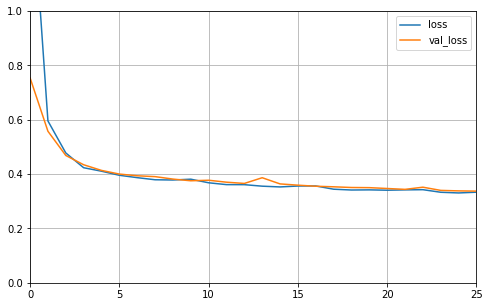

In [24]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [25]:
# 用测试集进行模型的评估    .返回损失值&模型的度量值
model.evaluate(x_test_scaler, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3470485276492067